# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

## Task 6 : PREDICTION USING DECISION TREE ALGORITHM

#### AIM : Create the Decision Tree classifier and visualize it graphically.

#### Programming Language : Python 3

#### IDE : Jupyter Notebook

#### Author Name : Vaishnavi Rathod


## STEPS TO BE FOLLOWED :

#### Step 1 - Loading Dataset

#### Step 2 - Checking for missing values

#### Step 3 - Checking for multi-collinearity

#### Step 4 - Visualizing Data

#### Step 5 - Checking for inbalance data

#### Step 6 - Outliers

#### Step 7 - Distribution of the variables 

#### Step 8 - Preparing data for model

#### Step 9 - Classifying multi-class target

#### Step 10 - Dividing Data into X(independent variables) and y(dependent variables)

#### Step 11 - Spliting Data into train and test split

#### Step 12 - Model Building 

#### Step 13 - Vizualize Decision Tree 

#### Step 14 - Saving Model

In [36]:
import pandas as pd                                 
import numpy as np                                   
from matplotlib import pyplot as plt              
import seaborn as sns                                

from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV     
from sklearn.tree import DecisionTreeClassifier      

from sklearn.metrics import confusion_matrix, plot_confusion_matrix   
from sklearn.metrics import classification_report    
from sklearn.tree import plot_tree                 

import joblib # to save DTC model

In [2]:
import warnings # ignoring warnings 
warnings.filterwarnings("ignore")

## Step 1 - Loading Dataset

In [3]:
df = pd.read_csv("C:\\Users\\Vaishnavi\\Downloads\\Iris.csv",index_col='Id') # load dataset from location
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
df.shape

(150, 5)

## Step 2 - Checking for missing values

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

We can confirm that there are no non values.No missing value,that is good for us because we don't need to inpute those missing values or dropping them. 

## Step 3 - Checking for multi-collinearity

<AxesSubplot:>

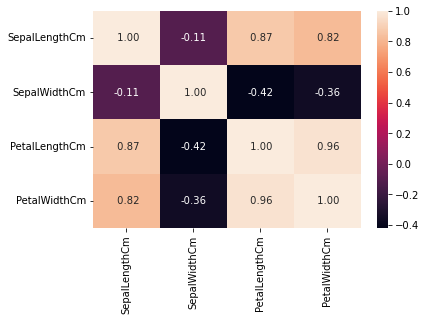

In [7]:
sns.heatmap(df.corr(), annot=True, fmt=' .2f',)

There are some features that are highly corelated with each other,like sepalLength and PetalLength (pearson correlation coefficient=0.87) Same with PetalLength and PetalWidth (pearson correlation coefficient=0.82)

In [8]:
def vif_scores(df): #calculating VIF scores for dataSet
    VIF_Scores = pd.DataFrame()
    VIF_Scores["Independent Features"] = df.columns
    VIF_Scores["VIF Scores"] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return VIF_Scores

In [9]:
vif_scores(df.iloc[:, :-1])

,Independent Features,VIF Scores
0,SepalLengthCm,264.745711
1,SepalWidthCm,97.111606
2,PetalLengthCm,173.968965
3,PetalWidthCm,55.488689


With high VIF values(>10)multi_collinearity exist in data.

Because we are going to use Decision Tree so we are not doing anything to remove multi-collinearity

## Step 4 - Visualizing Data

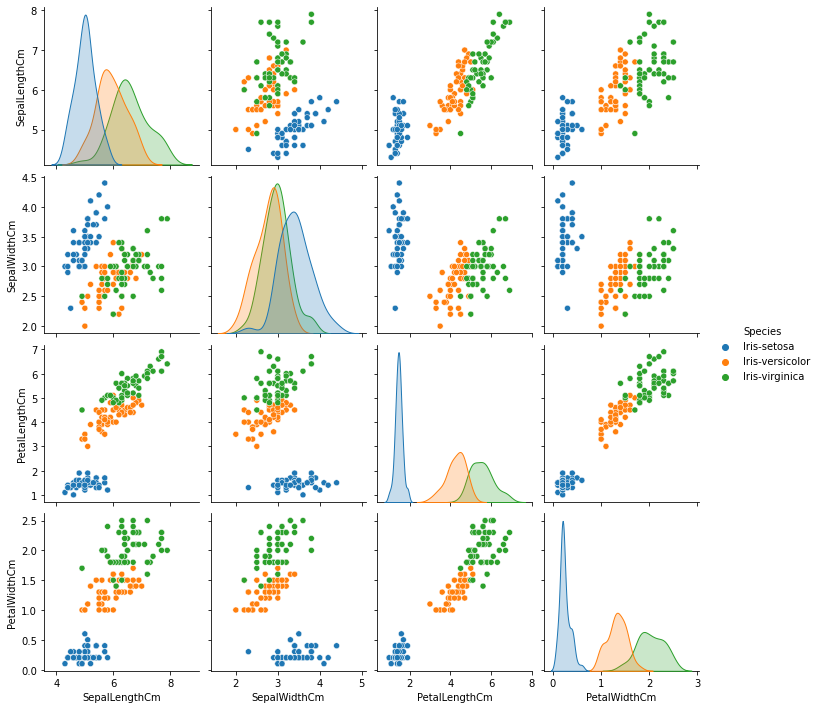

In [10]:
sns.pairplot(data=df, hue='Species')

## Step 5 - Checking for inbalance data 

<AxesSubplot:xlabel='Species', ylabel='count'>

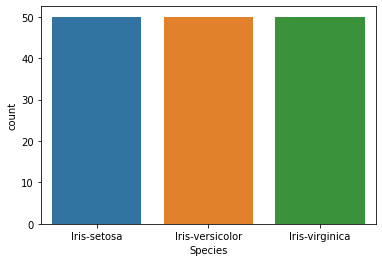

In [11]:
sns.countplot(x = 'Species', data=df)

We have equal no of counts of each class(33.33% each). Not imbalance data.

## Step 6 - Outliers

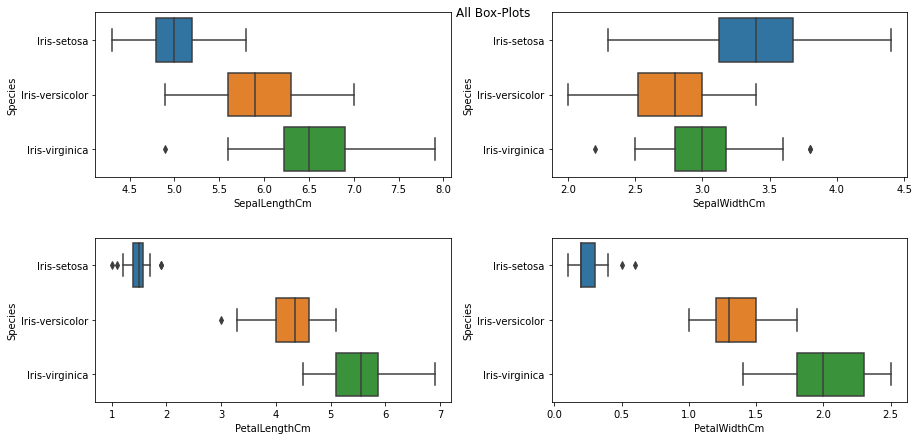

In [12]:
fig,ax = plt.subplots(2, 2, figsize=(12, 6))
fig.tight_layout(h_pad=4, w_pad=7)
plt.suptitle('All Box-Plots')

for i in range(2):
    for j in range(2):
        index =2*i +j
        sns.boxplot(y='Species', x=df.iloc[:, index], data=df, ax=ax[i, j])
plt.show()

There exist few outliers in data.Majority in 'PetalLengthcm'.Decision Tree don't get affected by outliers,unlike (KNN) Thats why not removing outliers 

## Step 7 - Distribution of the variables

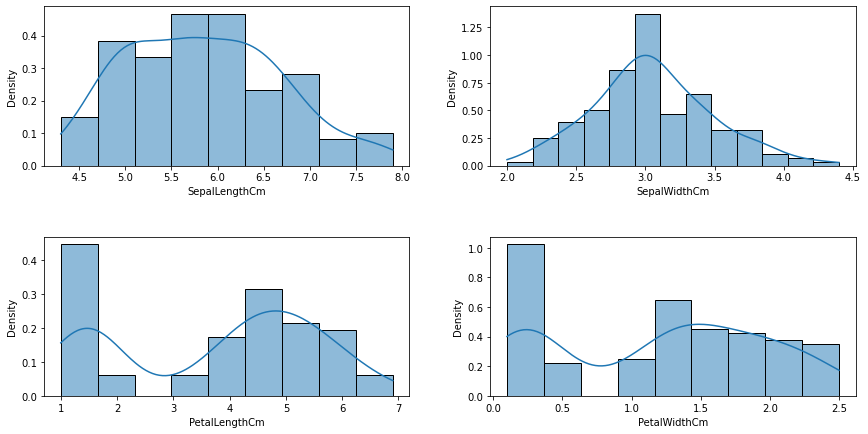

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12,6))
fig.tight_layout(h_pad=5, w_pad=5)


for i in range(2):
    for j in range(2):
        index =2*i +j
        sns.histplot(df.iloc[:, index], ax=ax[i, j], kde=True, stat='density')
        

## Step 8 -Preparing Data for Model

In [14]:
unique_types_i = df['Species'].unique()
unique_types = [x.replace('Iris-','') for x in unique_types_i]
unique_types

['setosa', 'versicolor', 'virginica']

In [15]:
mapper = {unique_types_i[x]:x for x in range(len(unique_types))}
mapper

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

## Step 9 -Classifying multi-class target

In [16]:
df['Species'] = df['Species'].map(mapper)
df['Species'].unique()


array([0, 1, 2], dtype=int64)

## Step 10 - Dividing Data into X(independent variables) and y(dependent variables)

In [17]:
X =df.iloc[:, :-1]
y =df.iloc[:, -1]

## Step 11 - Spliting Data into train and test split

default train set=70% of data and test set=30% data 

We are not Normalizing Data because DT don't need any kind of scaling because it doesn't use any distance algorithm, to select any branch it generally use gini score.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

We are scaling features with training set to avoid data-leakage

##  Step 12 - Model Building 

Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters

In [19]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier()

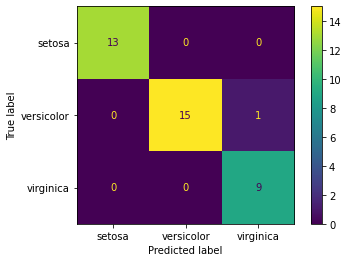

In [20]:
plot_confusion_matrix(clf_dt,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=unique_types)
plt.show()

In [21]:
y_pred = clf_dt.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



Out of the box DT perform very well with avg_accuracy 97% Let's still do hyper parameter opmization to see if we can improve model more.

precision recall,f1-score there value should be close to 1.0 is worst and 1 is best.

## Step 13 - Vizualize Decision Tree 

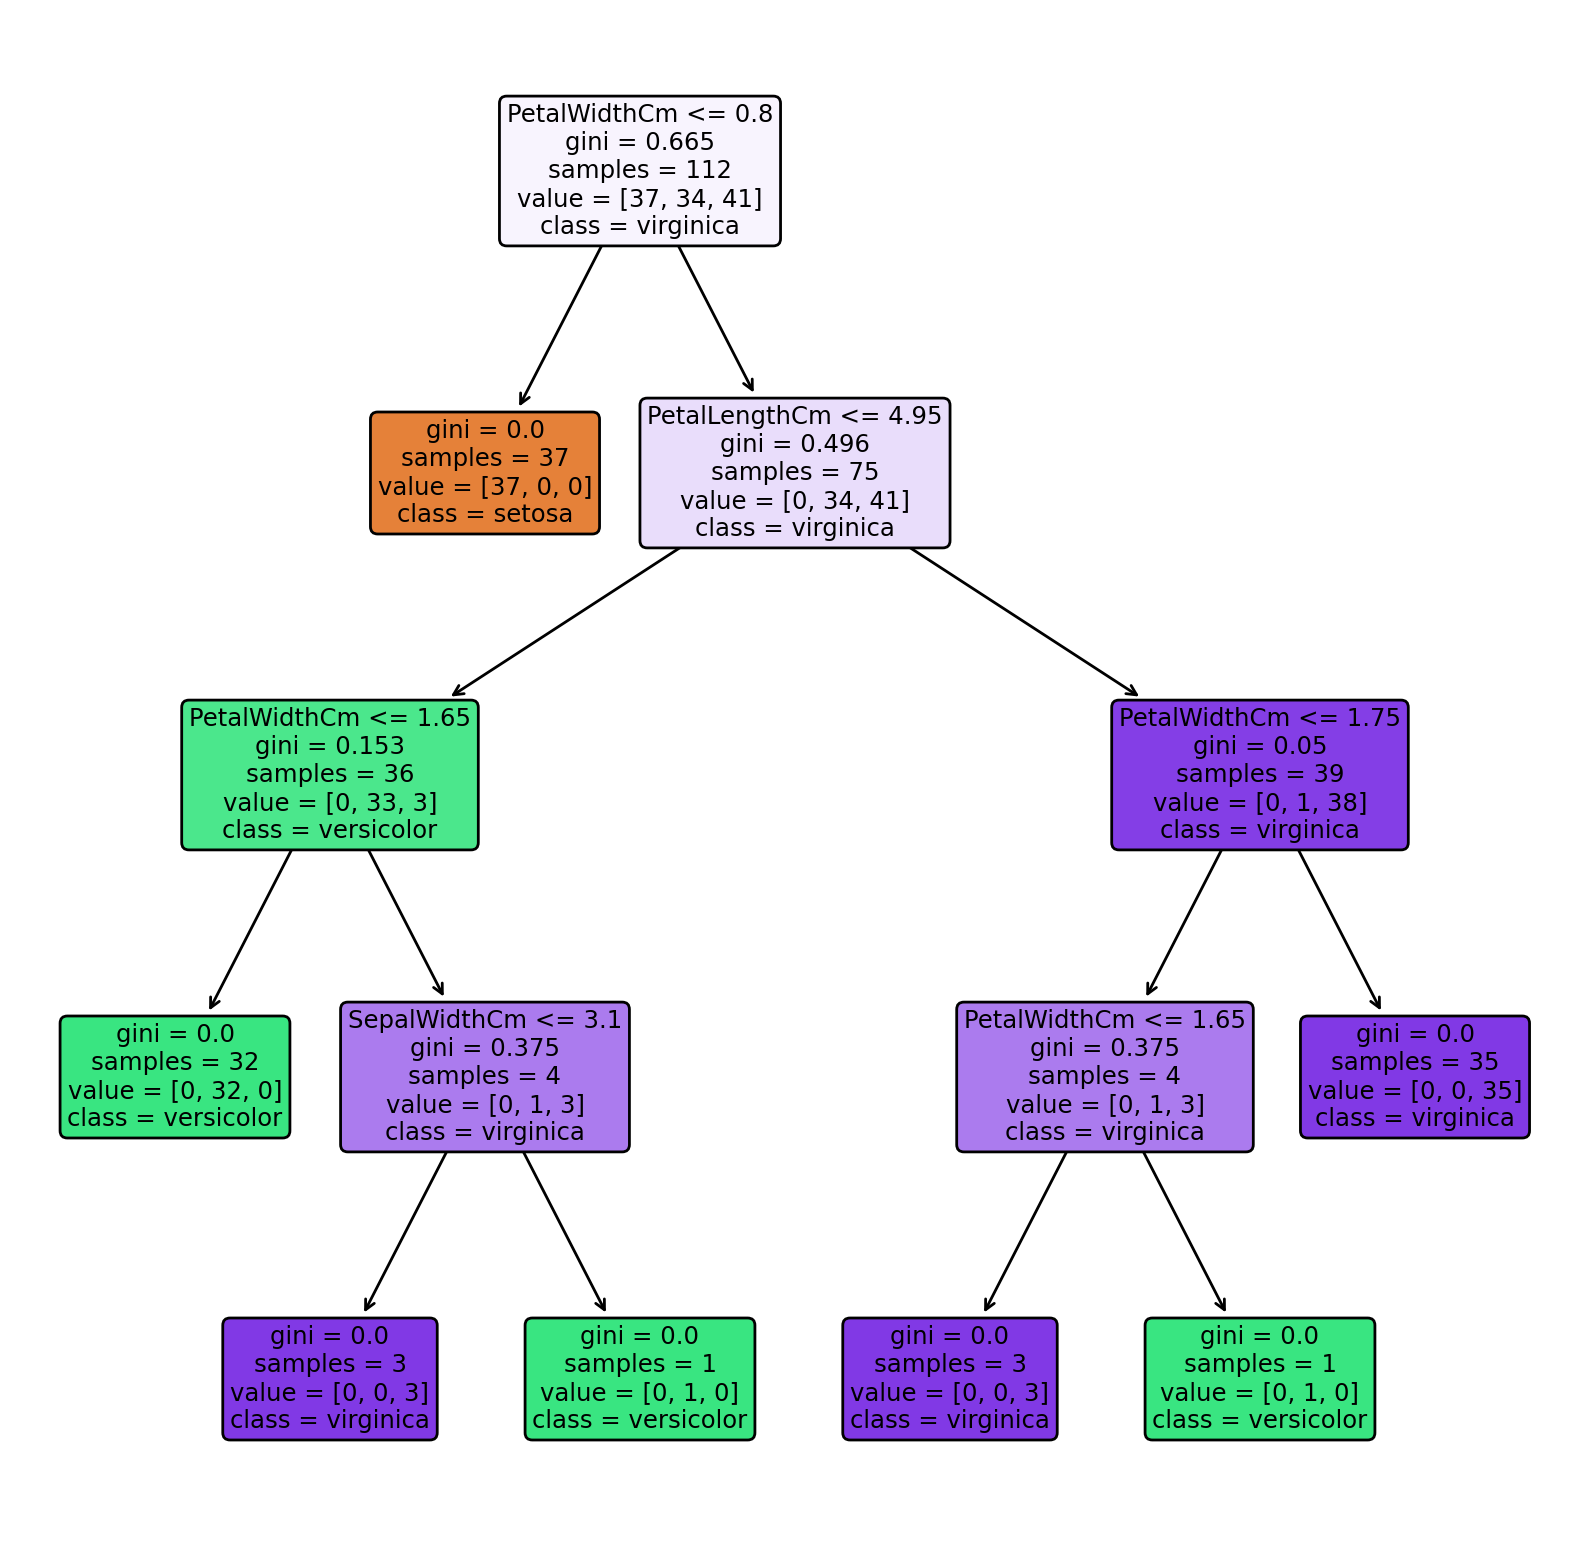

In [22]:
plt.figure(figsize=(10, 10), dpi=200)

plot_tree(clf_dt,
        feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
        class_names = unique_types,
        filled = True,
        rounded = True)

plt.show()

## Step 14 - Saving Model


In [41]:
filename = 'model_Iris'

In [42]:
joblib.dump(clf_dt, filename)

['model_Iris']